In [459]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [460]:
data = pd.read_excel('26AprilSD.xlsx')
print("Read the source excel")

Read the source excel


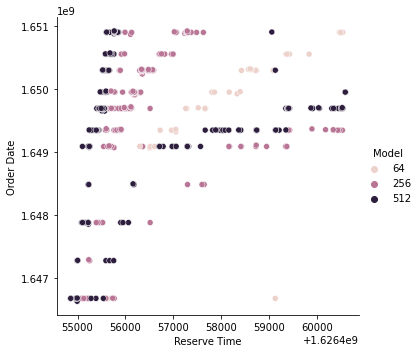

In [461]:
import seaborn as sns

sns.relplot(x="Reserve Time", y="Order Date", hue="Model", data=data)

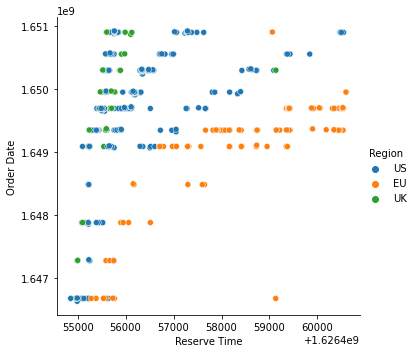

In [462]:
import seaborn as sns

sns.relplot(x="Reserve Time", y="Order Date", hue="Region", data=data)

In [463]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

In [464]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder()
data["Region"] = ordinal_enc.fit_transform(data[["Region"]])
data["Quarter"] = ordinal_enc.fit_transform(data[["Quarter"]])
data["Model"] = ordinal_enc.fit_transform(data[["Model"]])

print("Ordinal Encode Category Columns")

Ordinal Encode Category Columns


In [465]:
y = data.iloc[:, -1]

X = data.iloc[:, 0:4]

In [466]:
#Do a test train split
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)
print("Test Train Split")
data

Test Train Split


,Region,Model,Reserve Time,Quarter,Order Date
0,2.0,2.0,1626454990,0.0,1646629200
1,2.0,0.0,1626455638,0.0,1646674260
2,0.0,0.0,1626459131,0.0,1646674320
3,2.0,1.0,1626455226,0.0,1646674680
4,1.0,1.0,1626455184,0.0,1646674789
...,...,...,...,...,...
534,2.0,2.0,1626455765,1.0,1650914331
535,2.0,2.0,1626455772,1.0,1650921266
536,2.0,2.0,1626455761,1.0,1650924006
537,2.0,1.0,1626457291,1.0,1650927550


In [467]:
#use linear regression to train the model and score the accuracy of the model
model = LinearRegression()
model = LinearRegression().fit(X_train, y_train)

In [468]:
r_sq = model.score(X_valid, y_valid)
print(r_sq * 100)

76.3056029239898


374295.1014268663


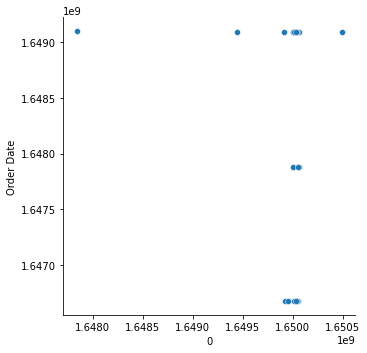

In [469]:
from sklearn.metrics import mean_absolute_error

preds = model.predict(X_valid)
print(mean_absolute_error(y_valid, preds))

df1 = pd.DataFrame(preds)
df2 = pd.DataFrame(y_valid)

v = pd.concat([df2, df1],axis=1)

sns.relplot(x=0,y="Order Date", data=v)

In [470]:
#Region	Model	Timestamp	ValveEstimate
d = {'Region': 2.0, 'Model': 0.0, "Reserve Time": 1626469138, "Quarter": 1.0}
df = pd.DataFrame(data=d, index=[0])

res  = model.predict(df)
print("{0:.0f}".format(res[0]))


1651945328


In [471]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

my_pipeline = XGBRegressor()

my_pipeline.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [472]:
r_sq = my_pipeline.score(X_valid, y_valid.values.ravel())
print(r_sq * 100)

96.80619765281847


In [473]:
from sklearn.metrics import mean_absolute_error

preds = my_pipeline.predict(X_valid)
print(mean_absolute_error(y_valid, preds))

107978.01851851853


In [474]:
#Region	Model	Timestamp	ValveEstimate
d = {'Region': 2.0, 'Model': 0.0, "Reserve Time": 1626469138, "Quarter": 1.0}
df = pd.DataFrame(data=d, index=[0])

res  = my_pipeline.predict(df)
print("{0:.0f}".format(res[0]))

1650904192


In [481]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=1)

regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=1)

In [482]:
r_sq = regr.score(X_valid, y_valid.values.ravel())
print(r_sq * 100)

74.97769175759232


In [483]:
d = {'Region': 2.0, 'Model': 0.0, "Reserve Time": 1626469138, "Quarter": 1.0}
df = pd.DataFrame(data=d, index=[0])

res  = regr.predict(df)
print("{0:.0f}".format(res[0]))

1650009917
